# Exploratory Data Analysis in AirBnB data

In this project, we will use the data collected by [Inside AirBnB](http://insideairbnb.com), and specifically the Athens data, in order to extract insights about the effect of AirBnB in the city.
(You can replace the Athens data with the data of any other city you want to explore).

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster
import seaborn as sns

listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

#the listings.csv with additional columns
listings_expanded = pd.read_csv('listings_expanded.csv')

In [2]:
#to get average rating of each listing
listings = listings.merge(listings_expanded[['id','review_scores_rating','listing_url']], on='id')

In [3]:
#invalid data
listings = listings[listings['price'] < 8000]

In [4]:
print(f'We have {listings.shape[0]} listings in total')

We have 12806 listings in total


## Popularity of neighbourhoods

**Approach 1:** We can analyze the popularity of the neighbourhoods, based on the number of the listings they have

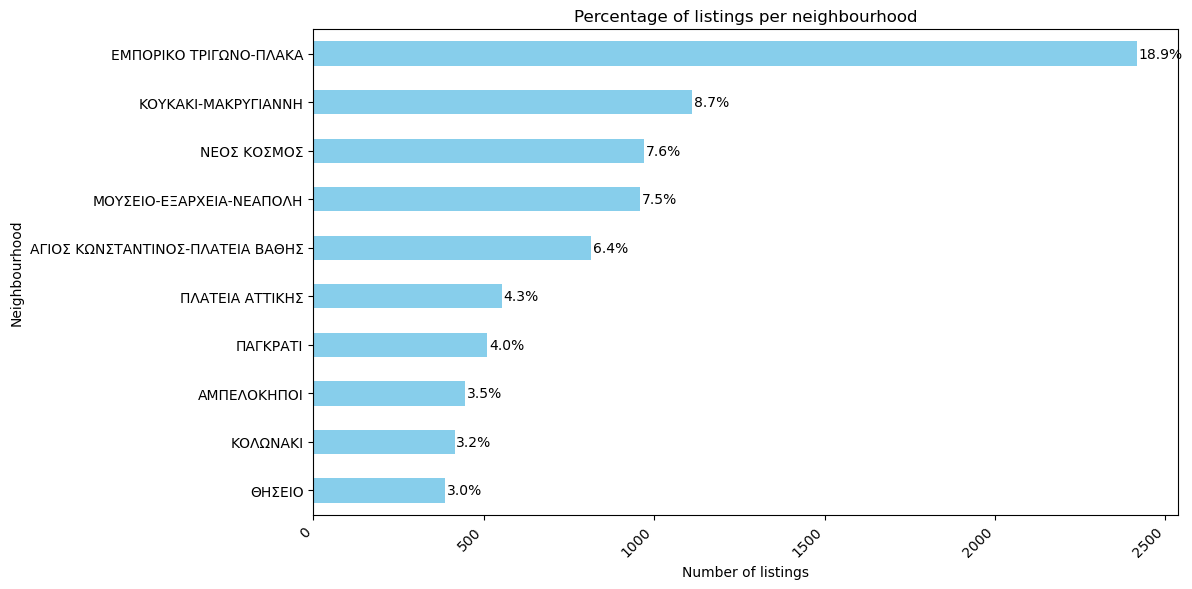

In [5]:
import matplotlib.pyplot as plt

neighbourhoods_percentage = listings['neighbourhood'].value_counts(normalize=True).head(10).sort_values(ascending=True)
neighbourhoods_actual = listings['neighbourhood'].value_counts().head(10).sort_values(ascending=True)

# multiply with 100 to convert to percentage
neighbourhoods_percentage = neighbourhoods_percentage.mul(100)

plt.figure(figsize=(12, 6))
bars = neighbourhoods_actual.plot(kind='barh', color='skyblue')
plt.title('Percentage of listings per neighbourhood')
plt.xlabel('Number of listings')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=45, ha='right')

#include the information as percentage
for bar, value in zip(bars.patches, neighbourhoods_percentage.values):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

**Approach 2:** We can analyze the popularity of the neighbourhoods, based on the number of the reviews of each neighbourhood

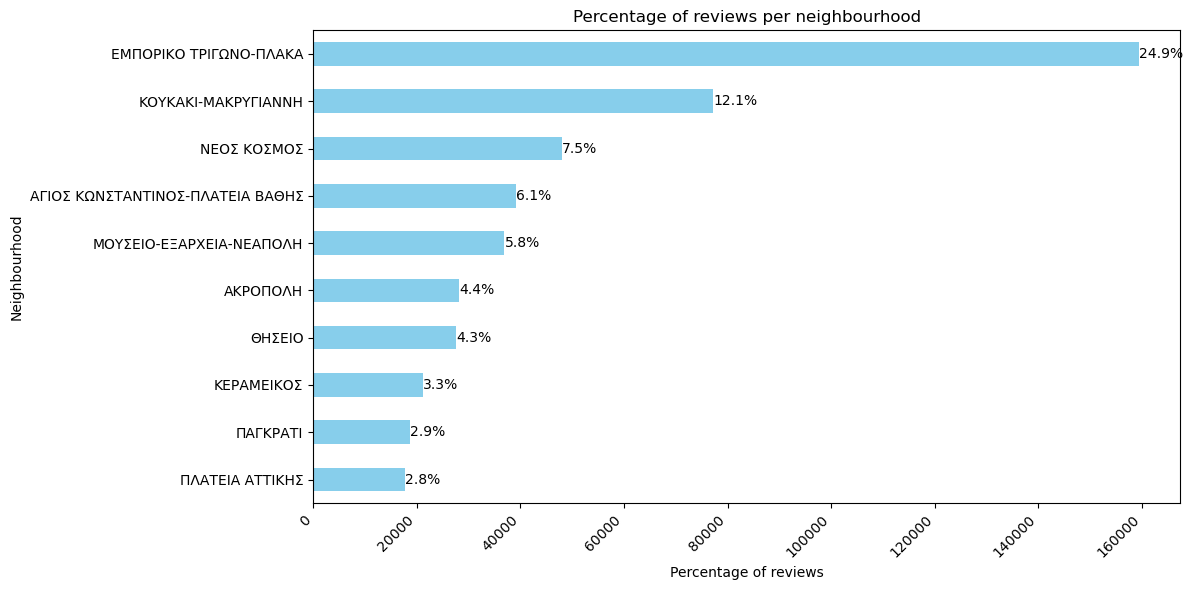

In [6]:
 #in order to merge with the reviews df
listings = listings.rename(columns={'id': 'listing_id'}) 
reviews_listings = reviews.merge(listings[['listing_id','neighbourhood']],on='listing_id')

reviews_listings_actual = reviews_listings['neighbourhood'].value_counts().head(10).sort_values(ascending=True)
reviews_listings_percentage = reviews_listings['neighbourhood'].value_counts(normalize=True).head(10).sort_values(ascending=True)

#multiply with 100 to convert to percentage
reviews_listings_percentage = reviews_listings_percentage.mul(100)

plt.figure(figsize=(12, 6))
bars = reviews_listings_actual.plot(kind='barh', color='skyblue')
plt.title('Percentage of reviews per neighbourhood')
plt.xlabel('Percentage of reviews')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=45, ha='right')

#include the information as percentage
for bar, value in zip(bars.patches, reviews_listings_percentage.values):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

We observe that the results are almost identical for the first 5 neighbourhoods, and differ in the rest.

## Neighbourhood Prices

We create a table with the prices per neighbourhood that contains

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

presented in descending order of the median price

To have a better view about the prices of each neighbourhood, we will exclude the listings that do not have at least 1 review.

In [7]:
listings_pos_reviews = listings[listings['number_of_reviews'] > 0]
neighborhood_prices = listings_pos_reviews.groupby('neighbourhood').agg({'price': ['median', 'mean', 'std', 'count']})
neighborhood_prices.columns = ['Median_Price', 'Mean_Price', 'Price_Std_Dev', 'Number_of_Listings']
neighborhood_prices = neighborhood_prices.sort_values(by='Median_Price', ascending=False)
neighborhood_prices

Median_Price  Mean_Price  Price_Std_Dev  \
neighbourhood                                                               
ΖΑΠΠΕΙΟ                                  100.0  161.785714     146.901366   
ΡΗΓΙΛΛΗΣ                                  98.0  118.000000      54.808758   
ΑΚΡΟΠΟΛΗ                                  92.0  128.162651     196.792752   
ΚΟΛΩΝΑΚΙ                                  91.0  121.616477      98.212358   
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                       83.0  111.521961     185.638114   
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                    82.0  123.778111     273.944892   
ΚΕΡΑΜΕΙΚΟΣ                                79.0  105.857639      91.258624   
ΘΗΣΕΙΟ                                    75.0  108.017857     114.864799   
ΙΛΙΣΙΑ                                    69.0   82.636364      53.157671   
ΛΥΚΑΒΗΤΤΟΣ                                67.5   92.152174      70.805573   
ΣΤΑΔΙΟ                                    64.5   85.637255     104.730458   
ΓΚΑΖΙ                                     64.0   77.853933      51.800217   
ΠΑΓΚΡΑΤΙ                                  63.0   81.492099      94.578473   
ΠΕΤΡΑΛΩΝΑ                                 60.0   79.644860     104.022076   
ΝΕΟΣ ΚΟΣΜΟΣ                               60.0   80.049161      73.847260   
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                            59.5   89.214286      72.602001   
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                  58.5   72.298969      58.241440   
ΒΟΤΑΝΙΚΟΣ                                 58.0  146.436620     528.085727   
ΠΕΔΙΟ ΑΡΕΩΣ                               55.0   75.041667      61.358893   
ΕΛΛΗΝΟΡΩΣΩΝ                               55.0   61.357143      28.122090   
ΓΟΥΔΙ                                     55.0   70.948718      61.802708   
ΓΟΥΒΑ                                     55.0   64.349206      37.365742   
ΠΟΛΥΓΩΝΟ                                  55.0   59.809524      29.724769   
ΑΜΠΕΛΟΚΗΠΟΙ                               55.0   65.802597      36.084933   
ΣΕΠΟΛΙΑ                                   51.0   52.923077      17.209827   
ΠΡΟΜΠΟΝΑ                                  50.0   51.777778      20.029839   
ΚΥΨΕΛΗ                                    50.0   66.281106      66.642490   
ΝΕΑ ΚΥΨΕΛΗ                                50.0   59.235294      32.709380   
ΚΟΛΩΝΟΣ                                   48.0   55.333333      28.254930   
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ          48.0   63.133136      68.877928   
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                           47.5   54.986486      33.981660   
ΑΝΩ ΠΑΤΗΣΙΑ                               47.0   55.218182      28.566810   
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                         46.0   51.825397      29.991687   
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                           45.0   62.951002      77.342047   
ΠΑΤΗΣΙΑ                                   44.0   57.940741     127.439407   
ΠΕΝΤΑΓΩΝΟ                                 43.5   43.500000       4.949747   
ΚΟΛΟΚΥΝΘΟΥ                                43.0   41.200000       7.627436   
ΡΙΖΟΥΠΟΛΗ                                 43.0   51.600000      26.953458   
ΓΚΥΖΗ                                     42.0   48.500000      25.910731   
ΝΙΡΒΑΝΑ                                   41.0   48.246377      25.105852   
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                          41.0   52.691729      40.299105   
ΑΝΩ ΚΥΨΕΛΗ                                40.5   45.350000      26.982364   
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                          40.0   45.482759      22.934099   
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                            40.0   47.829268      23.370238   

                                  Number_of_Listings  
neighbourhood                                         
ΖΑΠΠΕΙΟ                                          140  
ΡΗΓΙΛΛΗΣ                                           3  
ΑΚΡΟΠΟΛΗ                                         332  
ΚΟΛΩΝΑΚΙ                                         352  
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                              979  
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                          2001  
ΚΕΡΑΜΕΙΚΟΣ                                       28

## Availability per Day

We create a plot with the number of listings available per day

In [8]:
print('Min date: ', calendar['date'].min(), 'Max date: ',calendar['date'].max())

Min date:  2023-12-25 Max date:  2024-12-24


In [9]:
calendar['date'].value_counts()

2024-06-25    13182
2024-08-31    13182
2024-08-29    13182
2024-08-28    13182
2024-08-27    13182
              ...  
2024-04-20    13182
2024-04-19    13182
2024-12-22    13182
2023-12-25     9972
2024-12-24     3952
Name: date, Length: 366, dtype: int64

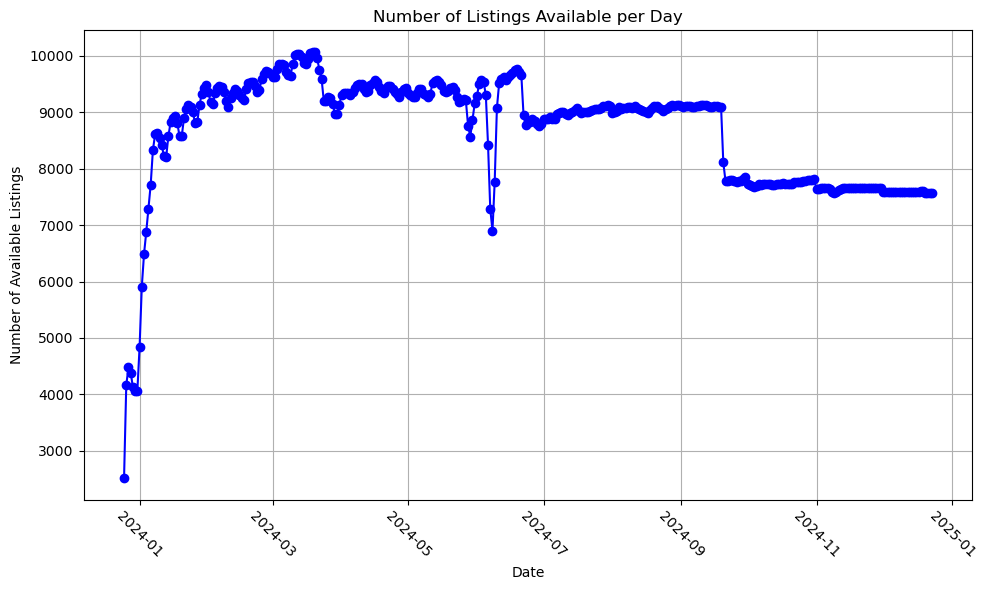

In [10]:
calendar['date'] = pd.to_datetime(calendar['date'])

# Select only the listings that are available (value = 't')
availability = calendar[calendar['available'] == 't']

#insignificant amount of data for the last date that we remove
availability = availability[availability['date'] < '2024-12-24']

available_per_day = availability.groupby('date').size().reset_index(name='listings_available')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(available_per_day['date'], available_per_day['listings_available'], marker='o', linestyle='-', color='b')

ax.set_title('Number of Listings Available per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Available Listings')

plt.xticks(rotation=-45)
ax.grid(True)
plt.tight_layout()
plt.show()

Firstly, availability is relatively low for the upcoming days but increases significantly after the winter holidays, starting from January 7th. The first slight decrease is observed around March 25th (Greek Independence Day - public holiday), indicating that some people have already booked their holidays. 

Additionally, there is a sudden decrease in bookings from June 6th to 9th, likely due to the upcoming Coldplay concert in Athens on June 8th and 9th, which has been scheduled for a year.

## Number of reviews Histogram  
We bin the number of reviews, to visualize the distribution of the number of reviews


In [11]:
min_rev = listings['number_of_reviews'].min()
max_rev = listings['number_of_reviews'].max()

print(f'The min number of reviews is: {min_rev}, and the max number of reviews is {max_rev}')

The min number of reviews is: 0, and the max number of reviews is 890


In [12]:
#round max reviews to the closest hundred
max_rev_rounded = round(listings['number_of_reviews'].max(), -2)  

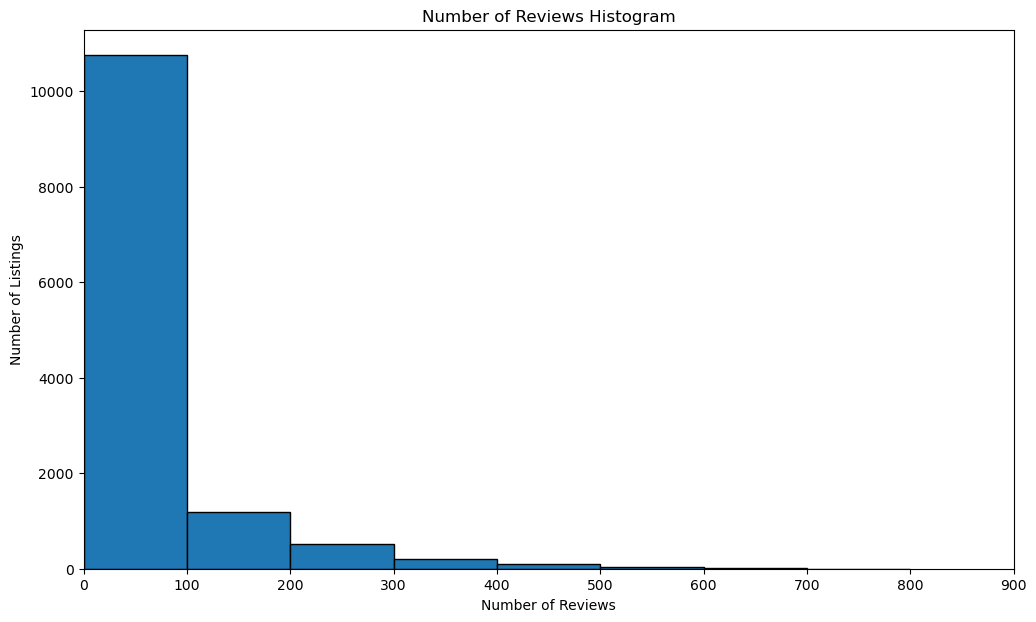

In [13]:
bin_edges = range(min_rev, max_rev_rounded, 100)
plt.figure(figsize=(12, 7))  
plt.hist(listings['number_of_reviews'], bins=bin_edges, edgecolor='k')
plt.xlabel('Number of Reviews')
plt.xlim(0,max_rev_rounded)
plt.ylabel('Number of Listings')
plt.title('Number of Reviews Histogram')
plt.show()

In [14]:
under_100_reviews_percentage = round(100*(listings[listings['number_of_reviews']  < 100].shape[0]) / listings.shape[0],2)
print(f'{under_100_reviews_percentage}% of total listings have less than 100 reviews')

83.93% of total listings have less than 100 reviews


# Reviews per month for 2023

In [15]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month
reviews['month_name'] = reviews['date'].dt.strftime('%B')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#for reviews per month plot
reviews['month_name'] = pd.Categorical(reviews['month_name'], categories=month_order, ordered=True)

print(reviews['date'].min(), reviews['date'].max())

2010-07-08 00:00:00 2023-12-25 00:00:00


We want to keep records for a full year, focusing on the most recent data available. The most recent date of a review is 2023-12-25. For this reason, We will keep reviews starting from 25 December 2022 until 25 December 2023.

In [16]:
selected_reviews = reviews[(reviews['date'] >= '2022-12-25') & (reviews['date'] <= '2023-12-25')]

In [17]:
reviews_per_month = selected_reviews['month_name'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=reviews_per_month.index,
    y=reviews_per_month.values,
    mode='lines+markers',
    name='Reviews per Month'
))

fig.update_layout(
    title="Number of Reviews per Month",
    xaxis_title="Month",
    yaxis_title="Number of Reviews",
    xaxis=dict(tickangle=45),
    width=800,
    height=500
)

fig.show()

Airbnb listings start getting very busy in May, with the peak appearing in September. The slight decrease in August makes sense, as most tourists prefer to visit the Greek islands instead of the capital. The period from December until March is the least busy throughout the year.

### Average Occupacy

We can find the average occupacy per listing per month, by calculating the average reviews per month and, using the assumption by [InsideAirBnB](https://insideairbnb.com/data-assumptions/) that indicates that half of the bookings result in reviews

**First approach:** using the column "reviews_per_month" of the listings df. This column represents "the average number of reviews per month the listing has over the lifetime of the listing", as documented in the [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).


In [18]:
listings['reviews_per_month'].isna().sum()

2021

In [19]:
set(listings[listings['reviews_per_month'].isna()]['number_of_reviews'])

{0}

**Note:** we assume that these listings do not have reviews yet, so they are excluded

In [20]:
#we can calculate the average reviews per listing per month, simply by using mean()
#the listings with no reviews are already excluded since they have 'NaN' value

reviews_per_listing_per_month = listings['reviews_per_month'].mean()

In [21]:
avg_occupacy = reviews_per_listing_per_month * 2
print(f'The average occupacy is {round(avg_occupacy,2)} bookings per month')

The average occupacy is 3.43 bookings per month


### Average Occupacy for 2023

**Second approach:** Using the reviews dataframe, but keeping the reviews only for the last year (the most recent available period of 365 days). This might reflect better the current demand and trends.

In [22]:
#again listings with no reviews are automatically excluded 
reviews_per_listing = selected_reviews.groupby('listing_id').size().reset_index(name='number_of_reviews')

#calculate the mean since we already have the sum of reviews
reviews_per_listing['reviews_per_month'] = round(reviews_per_listing['number_of_reviews']/12,2)

In [23]:
avg_occupacy2023 = reviews_per_listing['reviews_per_month'].mean() * 2

In [24]:
print(f'The average occupacy for 2023 is {round(avg_occupacy2023,2)} bookings per month')

The average occupacy for 2023 is 3.21 bookings per month


With the second approach, we do not use the column "reviews_per_month" in the listings dataframe, while here we focus only on reviews of the year 2023. 

### Average Occupacy plot for 2023

Since we do not have access to the actual number of nights for each booking, we use the assumption of InsideAirBnB that each booking is for a three nights stay ([Data Assumptions](https://insideairbnb.com/data-assumptions/)), along with the minimum nights number that each listing has set, if that number is higher than three (as followed by [InsideAirBnB](https://insideairbnb.com/). For this reason, this is an approximation and the actual occupacy rates might differ from the following plot.

In [25]:
#merge with listings to get the standard price and the minimum nights of stay of each listing
reviews_per_listing = reviews_per_listing.merge(listings[['listing_id','neighbourhood','price','minimum_nights']],on='listing_id')

In [26]:
def find_occupacy(row):
    if row['minimum_nights'] > 3:
        return row['minimum_nights'] * row['number_of_reviews'] * 2
    else:
        return 3 * row['number_of_reviews'] * 2
reviews_per_listing['total_occupacy']  = reviews_per_listing.apply(find_occupacy, axis=1)

In [27]:
#find the listings on which we did not have reviews for 2023
no_occupacy_listings = listings[~listings['listing_id'].isin(set(reviews_per_listing['listing_id']))]
occupacy_listings = pd.concat([reviews_per_listing, no_occupacy_listings[['listing_id','minimum_nights','price','number_of_reviews']]])

In [28]:
#fill with 0 the rows on which we do not have reviews
occupacy_listings = occupacy_listings.fillna(0)

In [29]:
#combine the total occupacy values into bins
bin_edges = [0,0.01, 60, 120, 180, 240, float('inf')]
bin_labels = ['0', '1-60', '60-120', '120-180', '180-240', '240+']

occupacy_listings['occupacy_grouped'] = pd.cut(occupacy_listings['total_occupacy'], bins=bin_edges, labels=bin_labels, include_lowest=True)

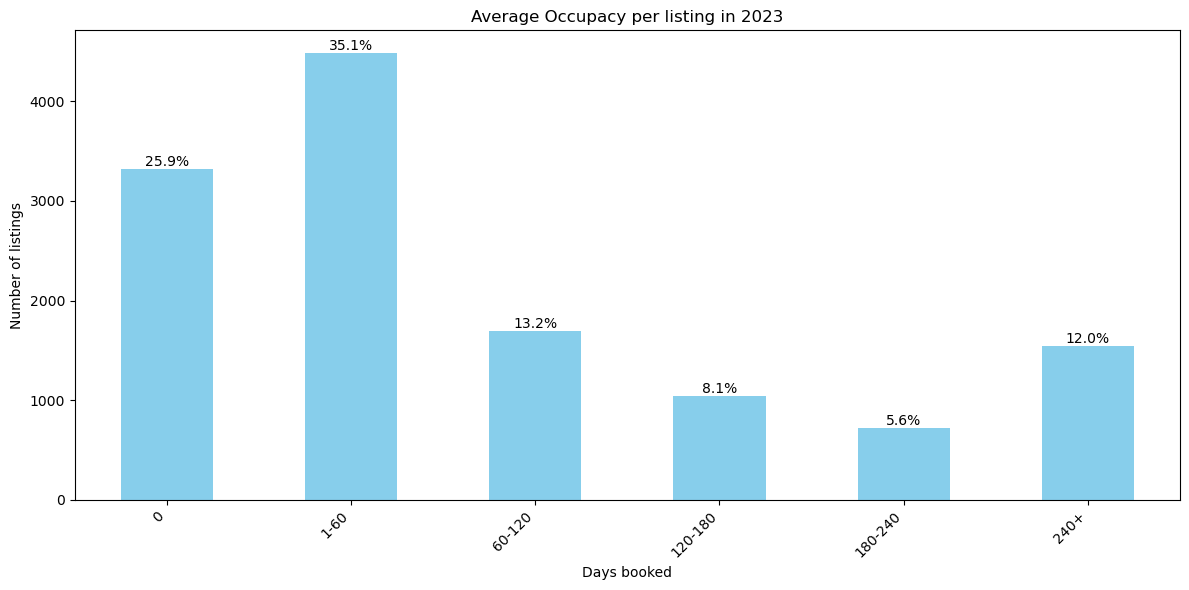

In [30]:
occupacy_listings_actual = occupacy_listings['occupacy_grouped'].value_counts().reindex(bin_labels)
occupacy_listings_percentage = occupacy_listings['occupacy_grouped'].value_counts(normalize=True).reindex(bin_labels)

plt.figure(figsize=(12, 6))
bars = occupacy_listings_actual.plot(kind='bar', color='skyblue')
plt.title('Average Occupacy per listing in 2023')
plt.xlabel('Days booked')
plt.ylabel('Number of listings')
plt.xticks(rotation=45, ha='right')

#include the information as percentage
for bar, value in zip(bars.patches, occupacy_listings_percentage.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1%}', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

We observe that 27% of the listings were empty for the year of 2023, either because some were knew, or possibly were unavailable. Additionally, it is possible that some listings with occupancy exceeding 240 days were hostels or shared rooms, which are capable of accommodating multiple guests simultaneously.

### Average monthly income

Given the assumption that each booking is for a three nights stay ([Data Assumptions](https://insideairbnb.com/data-assumptions/)), we can find the average income per month, using the average price charged for all the listings. We will exclude again the ones that do not have reviews.

In [31]:
avg_price = round(listings_pos_reviews['price'].mean(),2)
avg_price

90.84

In [32]:
avg_income = avg_occupacy * avg_price * 3
print(f'The average monthly income for a listing in Athens is {int(round(avg_income,0))} euros')

The average monthly income for a listing in Athens is 936 euros


### Average monthly income for 2023

In [33]:
# we will calculate the average price again only for the listings had at least 1 review
listings_2023 = set(reviews_per_listing['listing_id'])  
listings_2023 = listings[listings['listing_id'].isin(listings_2023)] 

avg_price2023 = round(listings_2023['price'].mean(),2)
avg_price2023

87.11

In [34]:
avg_income2023 = avg_occupacy2023 * avg_price2023 * 3
print(f'The average monthly income for a listing in Athens in 2023 is {int(round(avg_income2023,0))} euros')

The average monthly income for a listing in Athens in 2023 is 838 euros


## Considering the minimum nights and the standard price of each listing

**Third approach**: The assumptions that every booking lasts for three nights and the use of the mean price can lead to notable differences. Some listings might have very high prices, resulting in fewer bookings, but highly influence the mean. To refine our approach, we can take into account the minimum nights set for each listing and their standard price. This way, we can can calculate an approximation of the income of each listing, and then calculate the average income for the whole city.

We will again consider only the listings that had at least 1 review in 2023, and calculate the average income for that year

In [35]:
reviews_per_listing['year_bookings'] = reviews_per_listing['number_of_reviews'] * 2

In [36]:
#for listings that have not set a standard price, we will have to use the average price of all the rest listings
reviews_per_listing['price'].fillna(round(reviews_per_listing['price'].mean(),2), inplace=True)

In [37]:
reviews_per_listing['income'] = reviews_per_listing['year_bookings'] * reviews_per_listing['minimum_nights'] * reviews_per_listing['price']

In [38]:
print(f"The average monthly income for a listing in Athens in 2023 is {int(round(reviews_per_listing['income'].mean()/12,2))} euros")
print(f"The average yearly income for a listing in Athens in 2023 is {int(12* round(reviews_per_listing['income'].mean()/12,2))} euros")

The average monthly income for a listing in Athens in 2023 is 483 euros
The average yearly income for a listing in Athens in 2023 is 5800 euros


**Note:** While this method considers the information provided by each listing, it has 2 limitations:

* In estimating the income, we utilize the minimum nights required for each booking. However, it is possible that guests may book for longer durations than the minimum, potentially resulting in higher total income.
* Prices may vary over months, due to factors such as the season or the demand.

However, this is just an approximation, and unfortunately, these additional data are not available for consideration.

## Average yearly income per Neighbourhood

Using the third approach, we will calculate the average yearly income per Neighbourhood

In [39]:
income_per_neighbourhood = reviews_per_listing.groupby('neighbourhood').agg({'income': ['mean', 'count']}).reset_index()
income_per_neighbourhood.columns = ['neighbourhood','average_yearly_income','number_of_listings']
income_per_neighbourhood['average_yearly_income'] = round(income_per_neighbourhood['average_yearly_income'],2).astype(int)
income_per_neighbourhood = income_per_neighbourhood.sort_values('average_yearly_income',ascending=False)
income_per_neighbourhood

neighbourhood  average_yearly_income  \
16                           ΖΑΠΠΕΙΟ                  16624   
5                           ΑΚΡΟΠΟΛΗ                  11163   
17                            ΘΗΣΕΙΟ                  10162   
23               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                   9536   
15            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                   7669   
0                     1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   7469   
21                          ΚΟΛΩΝΑΚΙ                   6526   
19                        ΚΕΡΑΜΕΙΚΟΣ                   6311   
10                             ΓΚΑΖΙ                   5719   
28                       ΝΕΟΣ ΚΟΣΜΟΣ                   5625   
9                          ΒΟΤΑΝΙΚΟΣ                   5552   
42                            ΣΤΑΔΙΟ                   5372   
39                          ΡΗΓΙΛΛΗΣ                   4821   
34                         ΠΕΤΡΑΛΩΝΑ                   4626   
26          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                   4360   
32                       ΠΕΔΙΟ ΑΡΕΩΣ                   4044   
2   ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ                   3826   
30                          ΠΑΓΚΡΑΤΙ                   3762   
25                        ΛΥΚΑΒΗΤΤΟΣ                   3631   
22                           ΚΟΛΩΝΟΣ                   3469   
4                  ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   3360   
18                            ΙΛΙΣΙΑ                   3354   
43                   ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                   3162   
24                            ΚΥΨΕΛΗ                   3049   
36                   ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                   2963   
13                             ΓΟΥΔΙ                   2948   
33                         ΠΕΝΤΑΓΩΝΟ                   2738   
12                             ΓΟΥΒΑ                   2715   
29                           ΝΙΡΒΑΝΑ                   2658   
1                   ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                   2657   
6                        ΑΜΠΕΛΟΚΗΠΟΙ                   2583   
8                        ΑΝΩ ΠΑΤΗΣΙΑ                   2502   
37                          ΠΟΛΥΓΩΝΟ                   2470   
27                        ΝΕΑ ΚΥΨΕΛΗ                   2383   
3                     ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                   2343   
41                           ΣΕΠΟΛΙΑ                   2195   
14                       ΕΛΛΗΝΟΡΩΣΩΝ                   2137   
20                        ΚΟΛΟΚΥΝΘΟΥ                   2019   
11                             ΓΚΥΖΗ                   2006   
31                           ΠΑΤΗΣΙΑ                   1941   
38                          ΠΡΟΜΠΟΝΑ                   1931   
35                  ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                   1904   
40                         ΡΙΖΟΥΠΟΛΗ                   1822   
7                         ΑΝΩ ΚΥΨΕΛΗ                   1808   

    number_of_listings  
16                 125  
5                  290  
17                 287  
23                 878  
15                1759  
0                   39  
21                 304  
19                 256  
10                  86  
28                 749  
9                   67  
42                 170  
39                   3  
34                 292  
26                 684  
32                  61  
2                  610  
30                 392  
25                 124  
22                  73  
4                   50  
18                 161  
43                  62  
24                 173  
36                 398  
13                 167  
33                   2  
12                  54  
29                 120  
1                   25  
6                  332  
8                   43  
37                  20  
27                  43  
3                   74  
41                  36  
14                  48  
20                   7  
11                  77  
31                 121  
38                   7  
35                 114  
40                   8  
7                   94

We observe that AirBnB hosts in Zappeio, a neighborhood near the central square of the city, earn the highest yearly income. Following Zappeio, the neighborhoods of Akropoli and Thiseio, which are home to the city's historical monuments, also see substantial earnings. In contrast, listings in Ano Kypseli and its surrounding areas are the least profitable in the city.

## Listings per Room Type

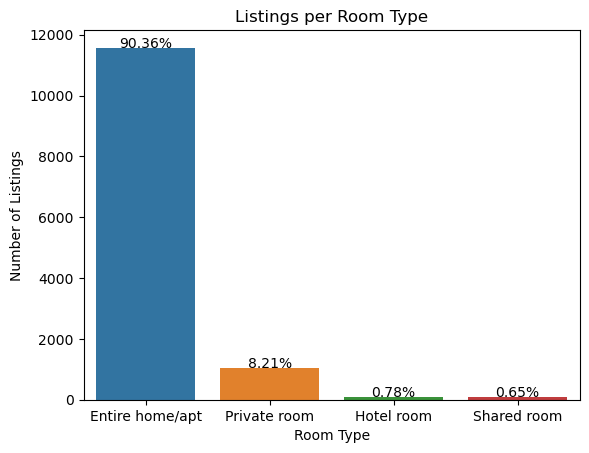

In [40]:
counts = listings['room_type'].value_counts()

sns.barplot(x=counts.index, y=counts.values)

total_count = sum(counts.values)
for i, count in enumerate(counts):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center')

plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Listings per Room Type')
plt.show()

With this chart we can easily understand that the AirBnB in Athens consists mainly of Entire homes/apartments. In other cities, these percentages may differ since other options such as "Private" and "Shared rooms" are budget-friendly solutions  and can be more popular.

### Νumber of listings per neighrbourhood and room type

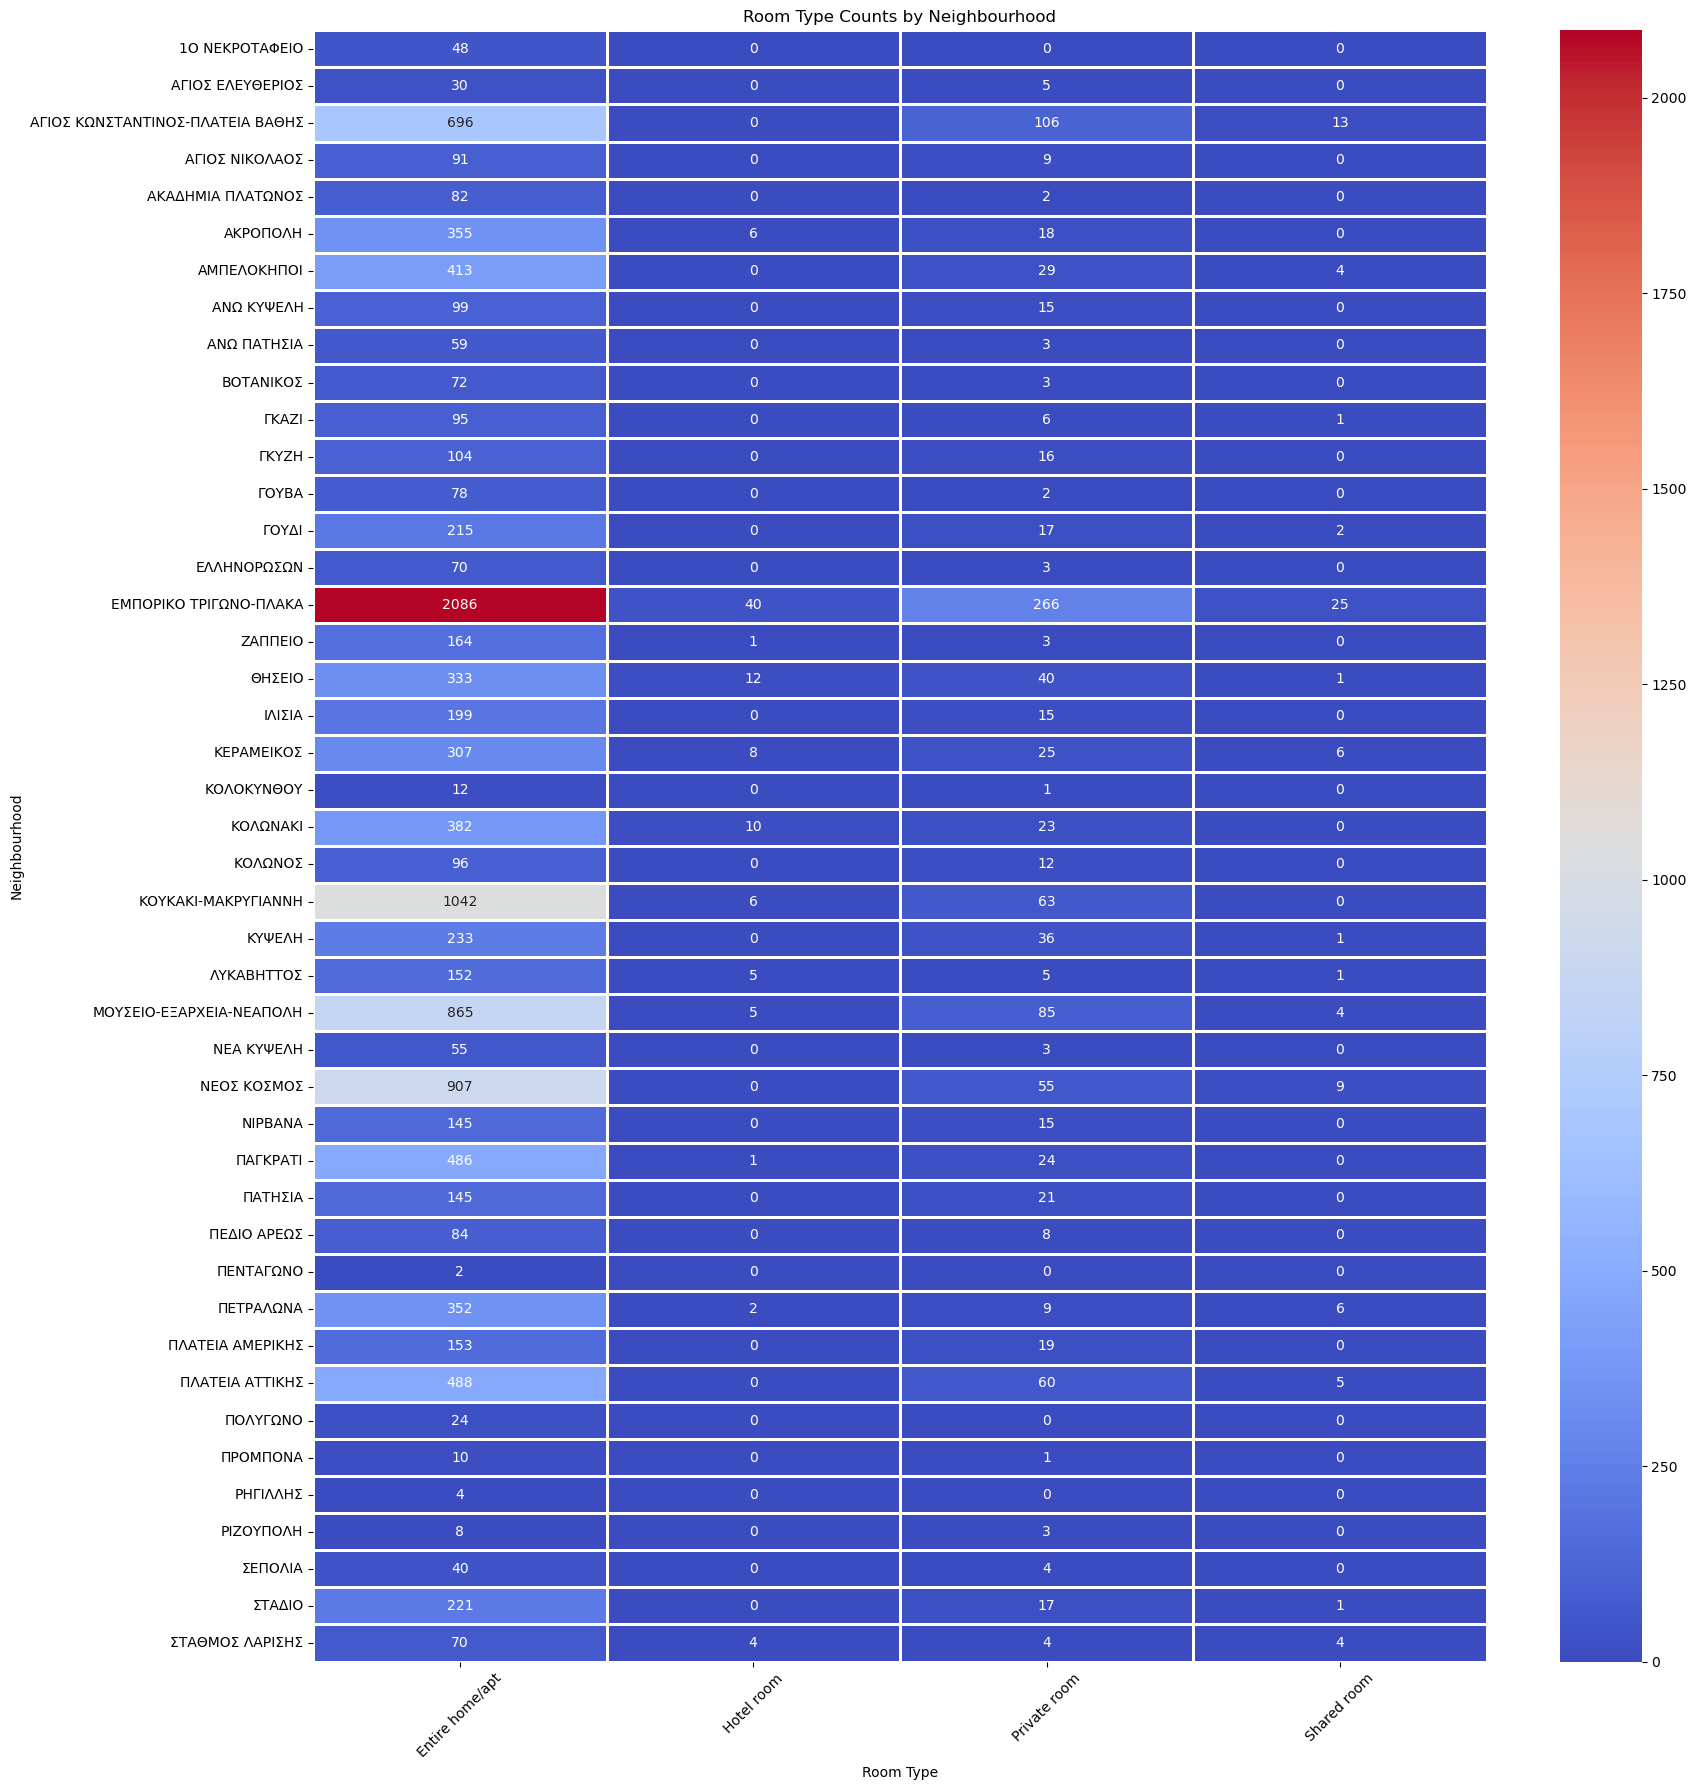

In [41]:
pivot_room_type = listings.pivot_table(index='neighbourhood', columns='room_type', aggfunc='size', fill_value=0)
plt.figure(figsize=(18, 18))
sns.heatmap(pivot_room_type, cmap='coolwarm', annot=True, fmt="d", linewidths=2)
plt.title('Room Type Counts by Neighbourhood')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Prices per Day

We will create a graph visualizing the average price per listing per day

In [42]:
calendar = pd.read_csv('calendarsept.csv')

In [43]:
#convert price column into a float format in order to visualize the price 
#this requires the removal of the dollar sign ($) and the comma (,)
calendar['price'] = calendar['price'].str.replace('[$,]', '', regex=True).astype(float)

In [44]:
print(calendar['date'].min(), calendar['date'].max())

2023-03-27 2024-03-31


In [45]:
calendar['date'].value_counts().tail(10)

2023-04-01    11381
2023-03-31    11381
2023-03-30    11381
2023-03-27     8135
2024-03-26     3259
2024-03-27        1
2024-03-28        1
2024-03-29        1
2024-03-30        1
2024-03-31        1
Name: date, dtype: int64

**Note:** We should normally keep the most recent dates, but since for these specific days we do not have sufficient data available (only 1 record for dates 27-31 of March), we decide to exclude these days since they will significantly effect the final graph.

In [69]:
calendar['date'] = pd.to_datetime(calendar['date'])
selected_calendar = calendar[(calendar['date'] <= '2024-03-26')]

In [70]:
price_per_day = selected_calendar.groupby('date')['price'].mean().reset_index()

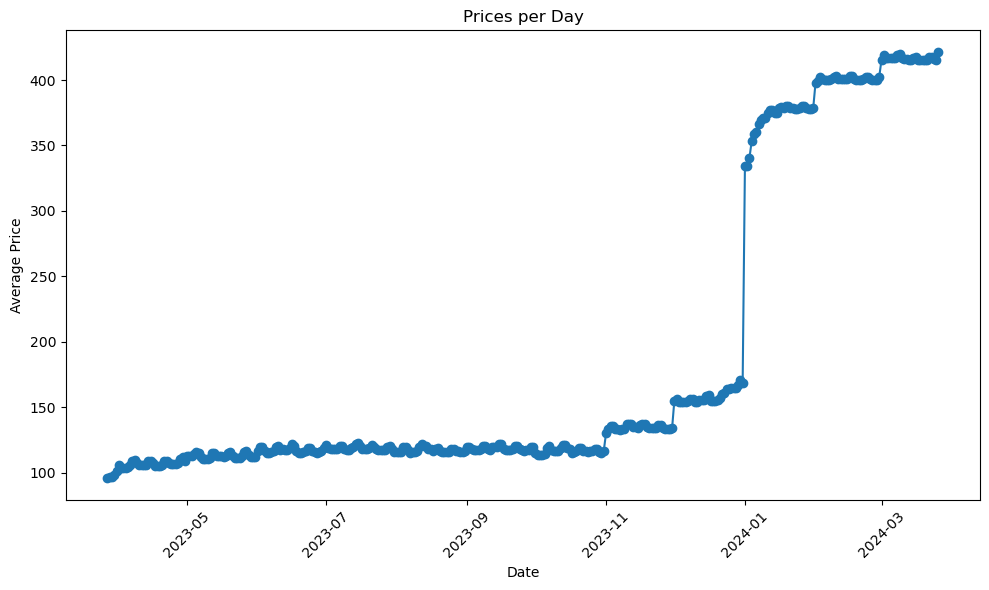

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(price_per_day['date'], price_per_day['price'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Prices per Day')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We observe that from May until November 2023, the average price remains relatively stable around 110 euros, with continuous increases after this period, until the sudden increase in January 2024, which probably represents an inaccuracy in the data.

### Ranking the hosts on number of listings basis
We rank the hosts, starting with the host with the highest number of listings

In [72]:
print('We have', len(set(listings['host_id'])), 'hosts')

We have 5621 hosts


In [73]:
per_host = listings['host_id'].value_counts().reset_index()
per_host.columns = ['host_id','listings']

#since we already have them in order, we just set a new column 'rank', starting from number 1 till the len of our df
per_host['rank'] = range(1, len(per_host) + 1)

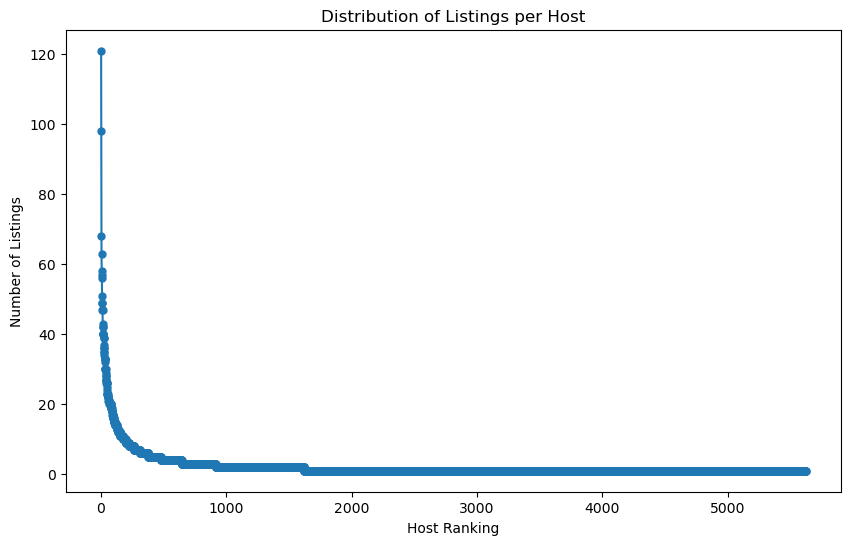

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(per_host['rank'], per_host['listings'], marker='o', linestyle='-', markersize=5)
plt.xlabel('Host Ranking')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings per Host')
plt.show()

### in logarithmic scale

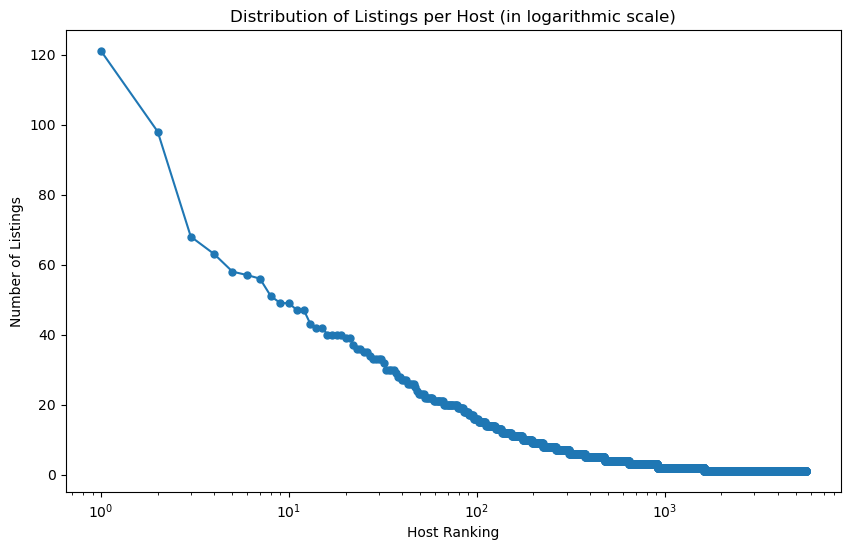

In [75]:
#we just add the xscale "log" in order to plot the diagram with the logarithmic scale
 
plt.figure(figsize=(10, 6))
plt.plot(per_host['rank'], per_host['listings'], marker='o', linestyle='-', markersize=5)
plt.xlabel('Host Ranking')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings per Host (in logarithmic scale)')
plt.xscale('log')    
plt.show()

In [76]:
#calculate number of listings per host
listings_per_host = per_host['listings'].value_counts().reset_index().rename(columns={'index':'number_of_listings','listings':'hosts'})

#calculate the total listings 
listings_per_host['total_listings'] = listings_per_host['number_of_listings'] * listings_per_host['hosts']

#bucketize all the hosts that acquire 5 or more listings into one group and take the sum
listings_per_host['number_of_listings'] = [lists if lists < 5 else 5 for lists in listings_per_host['number_of_listings']]
listings_per_host = listings_per_host.groupby('number_of_listings').sum()['total_listings']
listings_per_host = listings_per_host.reset_index()

In [77]:
#to display 5+ instead of 5 
def custom_label(i):
    if i == 5:
        return '5+'
    else:
        return str(i)
    
#to include the percentage on top of each bar
percentages = (listings_per_host['total_listings'] / listings_per_host['total_listings'].sum() * 100).round(2).astype(str) + '%'

trace = go.Bar(
    x=[custom_label(i) for i in listings_per_host['number_of_listings']],
    y=listings_per_host['total_listings'],
    text=percentages,
    textposition='outside'
)

layout = go.Layout(
    title="Listings per Host",
    xaxis=dict(title="Number of Listings per Host"),
    yaxis=dict(title="Number of Listings")
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


We observe that almost half of the total listings belong to hosts owning at least 5 listings, indicating an establishment of business operations, while almost 32% of the listings belong to hosts that do not possess another listing. 

In [78]:
for i in range(5):
    #find the hosts with the most listings in the city
    host_with_most_listings = per_host['host_id'].iloc[i]
    host_name = listings[listings['host_id'] == host_with_most_listings]['host_name'].iloc[i]
    print(f'Host {i+1}: "{host_name}" with number of listings: {per_host["listings"].iloc[i]}')

Host 1: "Upstreet" with number of listings: 121
Host 2: "Mgv" with number of listings: 98
Host 3: "Evan&Anetta" with number of listings: 68
Host 4: "Harry" with number of listings: 63
Host 5: "Homer & Isabella" with number of listings: 58


## Visualize Listings

Using the [folium](https://github.com/python-visualization/folium) library, we can create an interactive map to display the listings of the city, along with information such as name, neighbourhood, room type, price, rating and number of reviews. 

In [64]:
#fill with '-' the listings on which there is no rating
listings['review_scores_rating'] = listings['review_scores_rating'].fillna('-')

#find mean latitude and longitude of our data, so this point will be our center of our map
mean_lat = listings['latitude'].mean()   
mean_lng = listings['longitude'].mean()

first_map = folium.Map(location=[mean_lat, mean_lng], zoom_start=12)

marker_cluster = MarkerCluster().add_to(first_map)

# add to the cluster each of our listings with some description of them included (name,neighbourhood,room type, rating, price and number of reviews)

for index, row in listings.iterrows():
    airbnb_name = row['name']
    host = row['host_name']
    neighbourhood = row['neighbourhood']
    room_type = row['room_type']
    price = row['price']
    rating = row['review_scores_rating']
    reviews = row['number_of_reviews']
    url = row['listing_url']
    
    tooltip_text = f"""
    <b>Name:</b> {airbnb_name}<br>
    <b>Host:</b> {host}<br>
    <b>Neighbourhood:</b> {neighbourhood}<br>
    <b>Room Type:</b> {room_type}<br>
    <b>Price:</b> {price}€<br>
    <b>Rating:</b> {rating}<br>
    <b>Reviews:</b> {reviews}<br>
    <b>URL:</b> <a href="{url}" target="_blank">{url}</a>
    """
    
    popup_text = f"""
    <b>Name:</b> {airbnb_name}<br>
    <b>Host:</b> {host}<br>
    <b>Neighbourhood:</b> {neighbourhood}<br>
    <b>Room Type:</b> {room_type}<br>
    <b>Price:</b> {price}€<br>
    <b>Rating:</b> {rating}<br>
    <b>Reviews:</b> {reviews}<br>
    <b>URL:</b> <a href="{url}" target="_blank">{url}</a>
    """
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        tooltip=tooltip_text,
        icon=None
    ).add_to(marker_cluster)
first_map.add_child(marker_cluster)

#save into HTML file 
first_map.save('athens_airbnb_map.html') 

We can create another map where the **color** and **size** of each marker differs based on the rating and number of reviews of the listing.

In [65]:
mean_lat = listings['latitude'].mean()   
mean_lng = listings['longitude'].mean()

second_map  = folium.Map(location=[mean_lat, mean_lng], zoom_start=12)
    
#adjust the color based on the rating
def get_color(rating):
    if rating == '-':
        return 'darkred'
    elif rating >= 4.8:
        return 'green'
    elif rating >= 4.5:
        return 'lightgreen'
    elif rating >= 4:
        return 'lime'
    elif rating >= 3.5:
        return 'yellowgreen'
    elif rating >= 3:
        return 'gold'
    elif rating >= 2.5:
        return 'yellow'
    elif rating >= 2.0:
        return 'orange'
    elif rating >= 1.5:
        return 'orangered'
    elif rating >= 1:
        return 'red'
    else:
        return 'darkred'

#adjust size based on the number of reviews
def get_size(reviews):
    return 0.5 + reviews * 0.01  

for index, row in listings.iterrows():
    
    airbnb_name = row['name']
    host = row['host_name']
    neighbourhood = row['neighbourhood']
    room_type = row['room_type']
    price = row['price']
    rating = row['review_scores_rating']
    reviews = row['number_of_reviews']
    url = row['listing_url']
    
    # add html for better appearance of info and make the URL clickable
    tooltip_text = f"""
    <b>Name:</b> {airbnb_name}<br>
    <b>Host:</b> {host}<br>
    <b>Neighbourhood:</b> {neighbourhood}<br>
    <b>Room Type:</b> {room_type}<br>
    <b>Price:</b> {price}€<br>
    <b>Rating:</b> {rating}<br>
    <b>Reviews:</b> {reviews}<br>
    """
    
    popup_text = f"""
    <b>Name:</b> {airbnb_name}<br>
    <b>Host:</b> {host}<br>
    <b>Neighbourhood:</b> {neighbourhood}<br>
    <b>Room Type:</b> {room_type}<br>
    <b>Price:</b> {price}€<br>
    <b>Rating:</b> {rating}<br>
    <b>Reviews:</b> {reviews}<br>
    """
    
    folium.CircleMarker(
        airbnb_name = row['name'],
        neighbourhood = row['neighbourhood'],
        location=[row['latitude'], row['longitude']],
        radius=get_size(row['number_of_reviews']),
        color=get_color(row['review_scores_rating']),
        fill=True,
        fill_opacity=1,
        popup = popup_text,
        tooltip = tooltip_text
    ).add_to(second_map)
    
#save into HTML file 
second_map.save('athens_airbnb_map2.html')